# РК3 / ДЗ2 ОиРС Сергей Лагов ИУ8-72

Вариант 6 — sh(x)

In [3]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

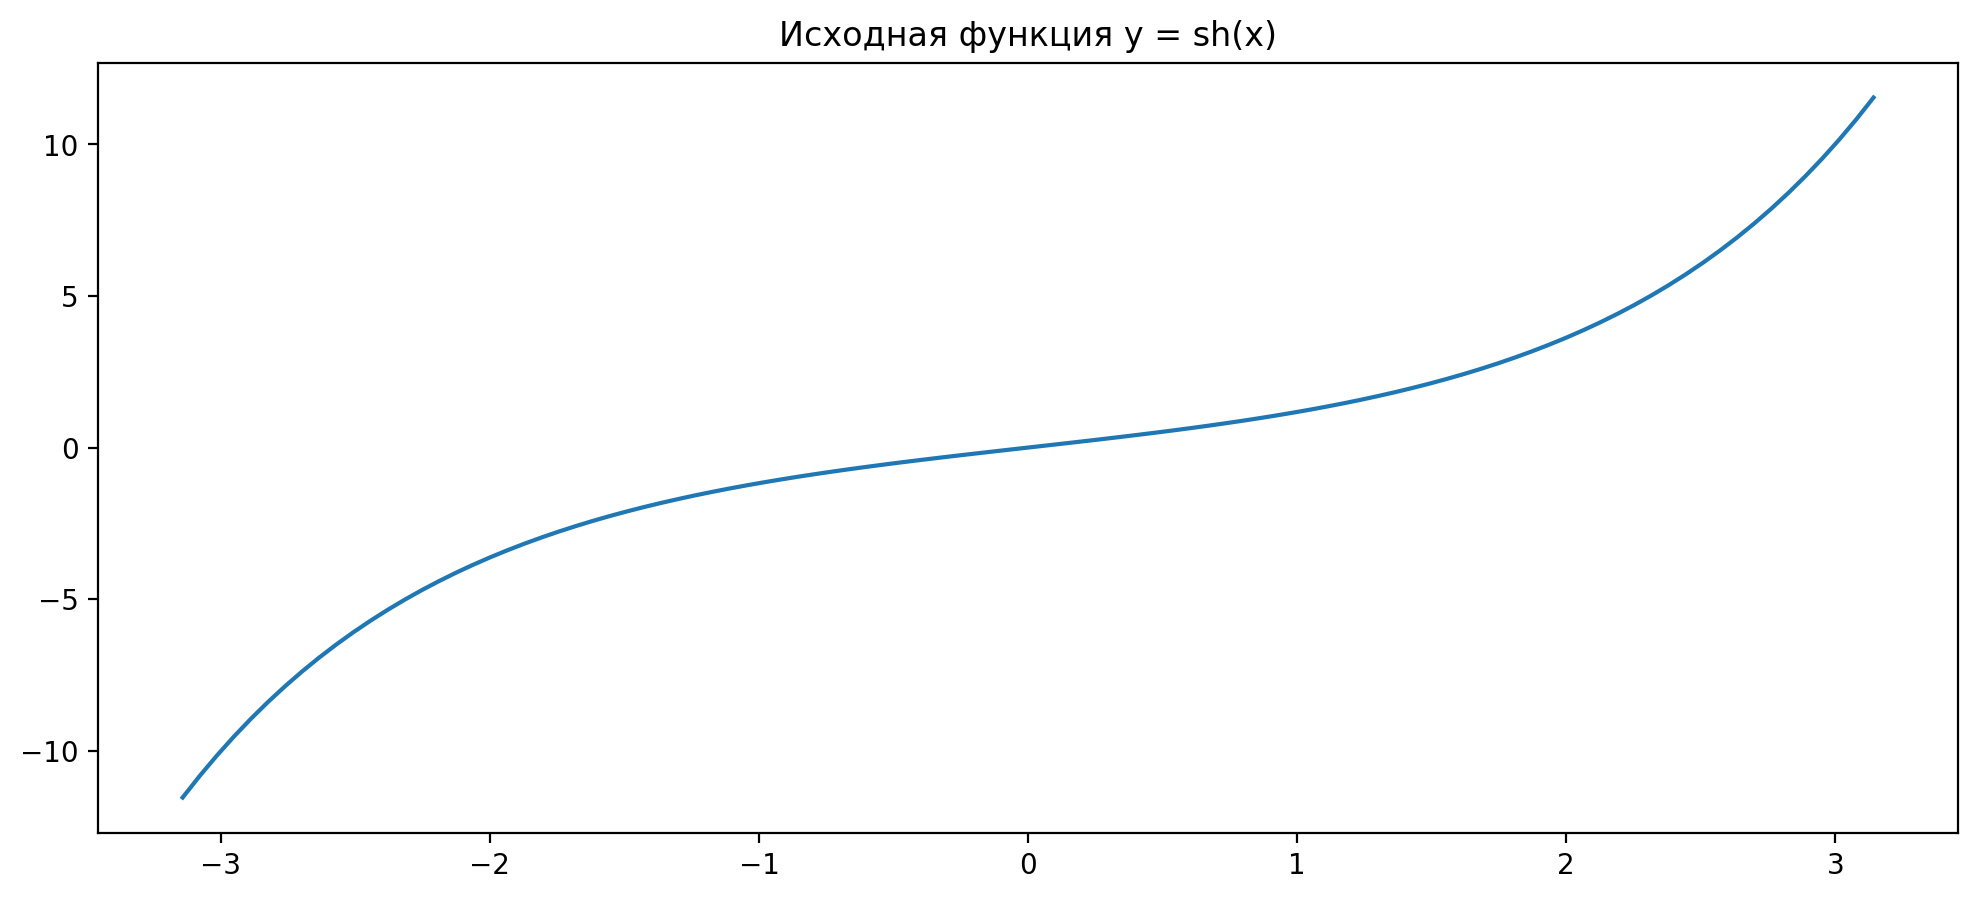

In [4]:
# Задание функции
x = np.linspace(-np.pi, np.pi, 100)
signal = np.sinh(x)
plt.figure(figsize=(12, 5), dpi=200)
plt.plot(x, signal)
plt.title('Исходная функция y = sh(x)')
plt.show()

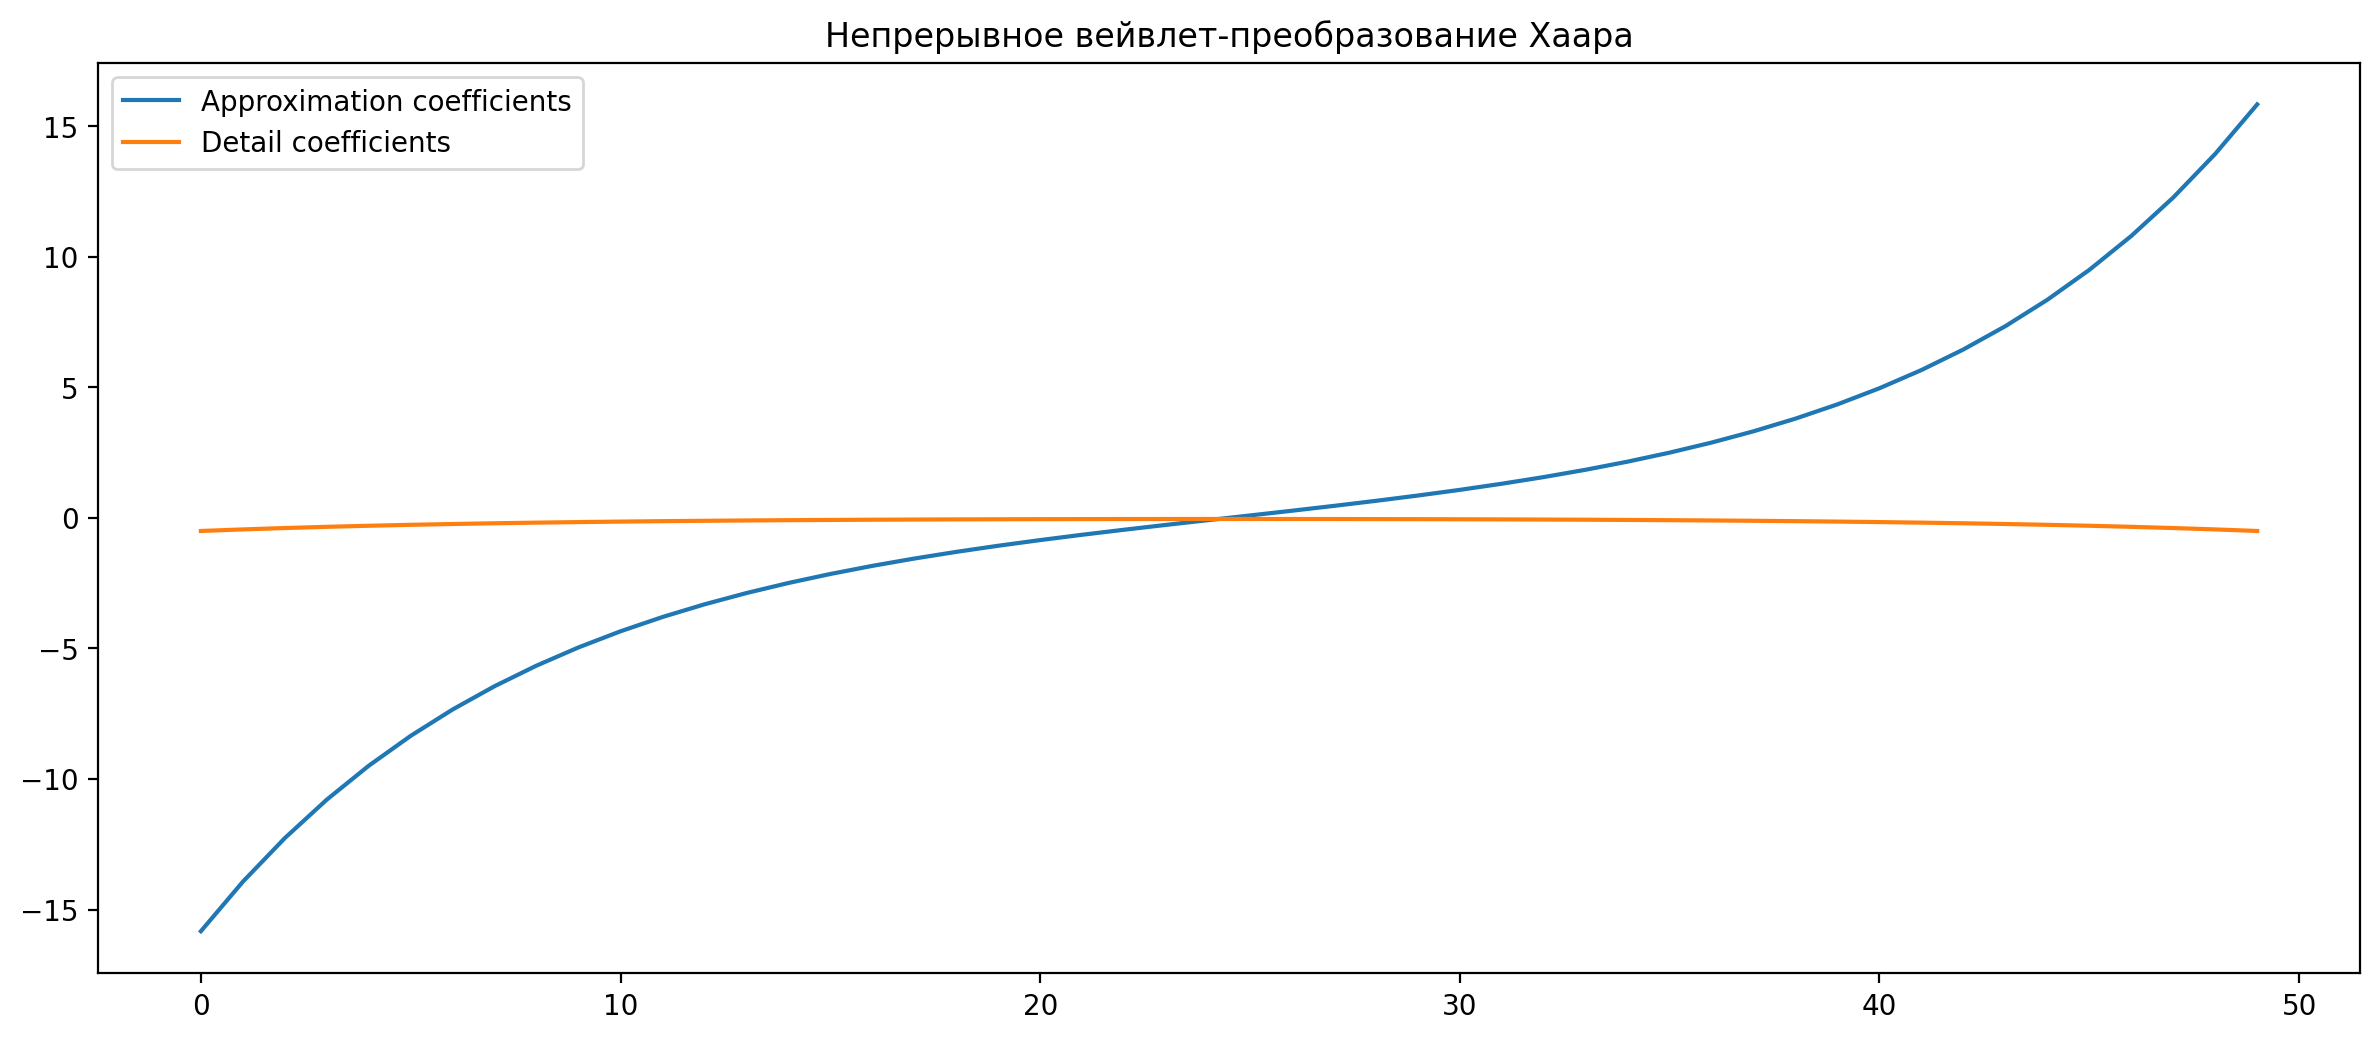

In [5]:
# 1 — 2 Выбор вейвлета и непрерывное вейвлет-преобразование
coeffs = pywt.dwt(signal, 'haar')  # Непрерывное вейвлет-преобразование Хаара

plt.figure(figsize=(12, 10), dpi=200)
plt.subplot(2, 1, 2)
plt.plot(coeffs[0], label='Approximation coefficients')  # Аппроксимационные коэффициенты
plt.plot(coeffs[1], label='Detail coefficients')  # Детальные коэффициенты
plt.legend()
plt.title('Непрерывное вейвлет-преобразование Хаара')
plt.tight_layout()

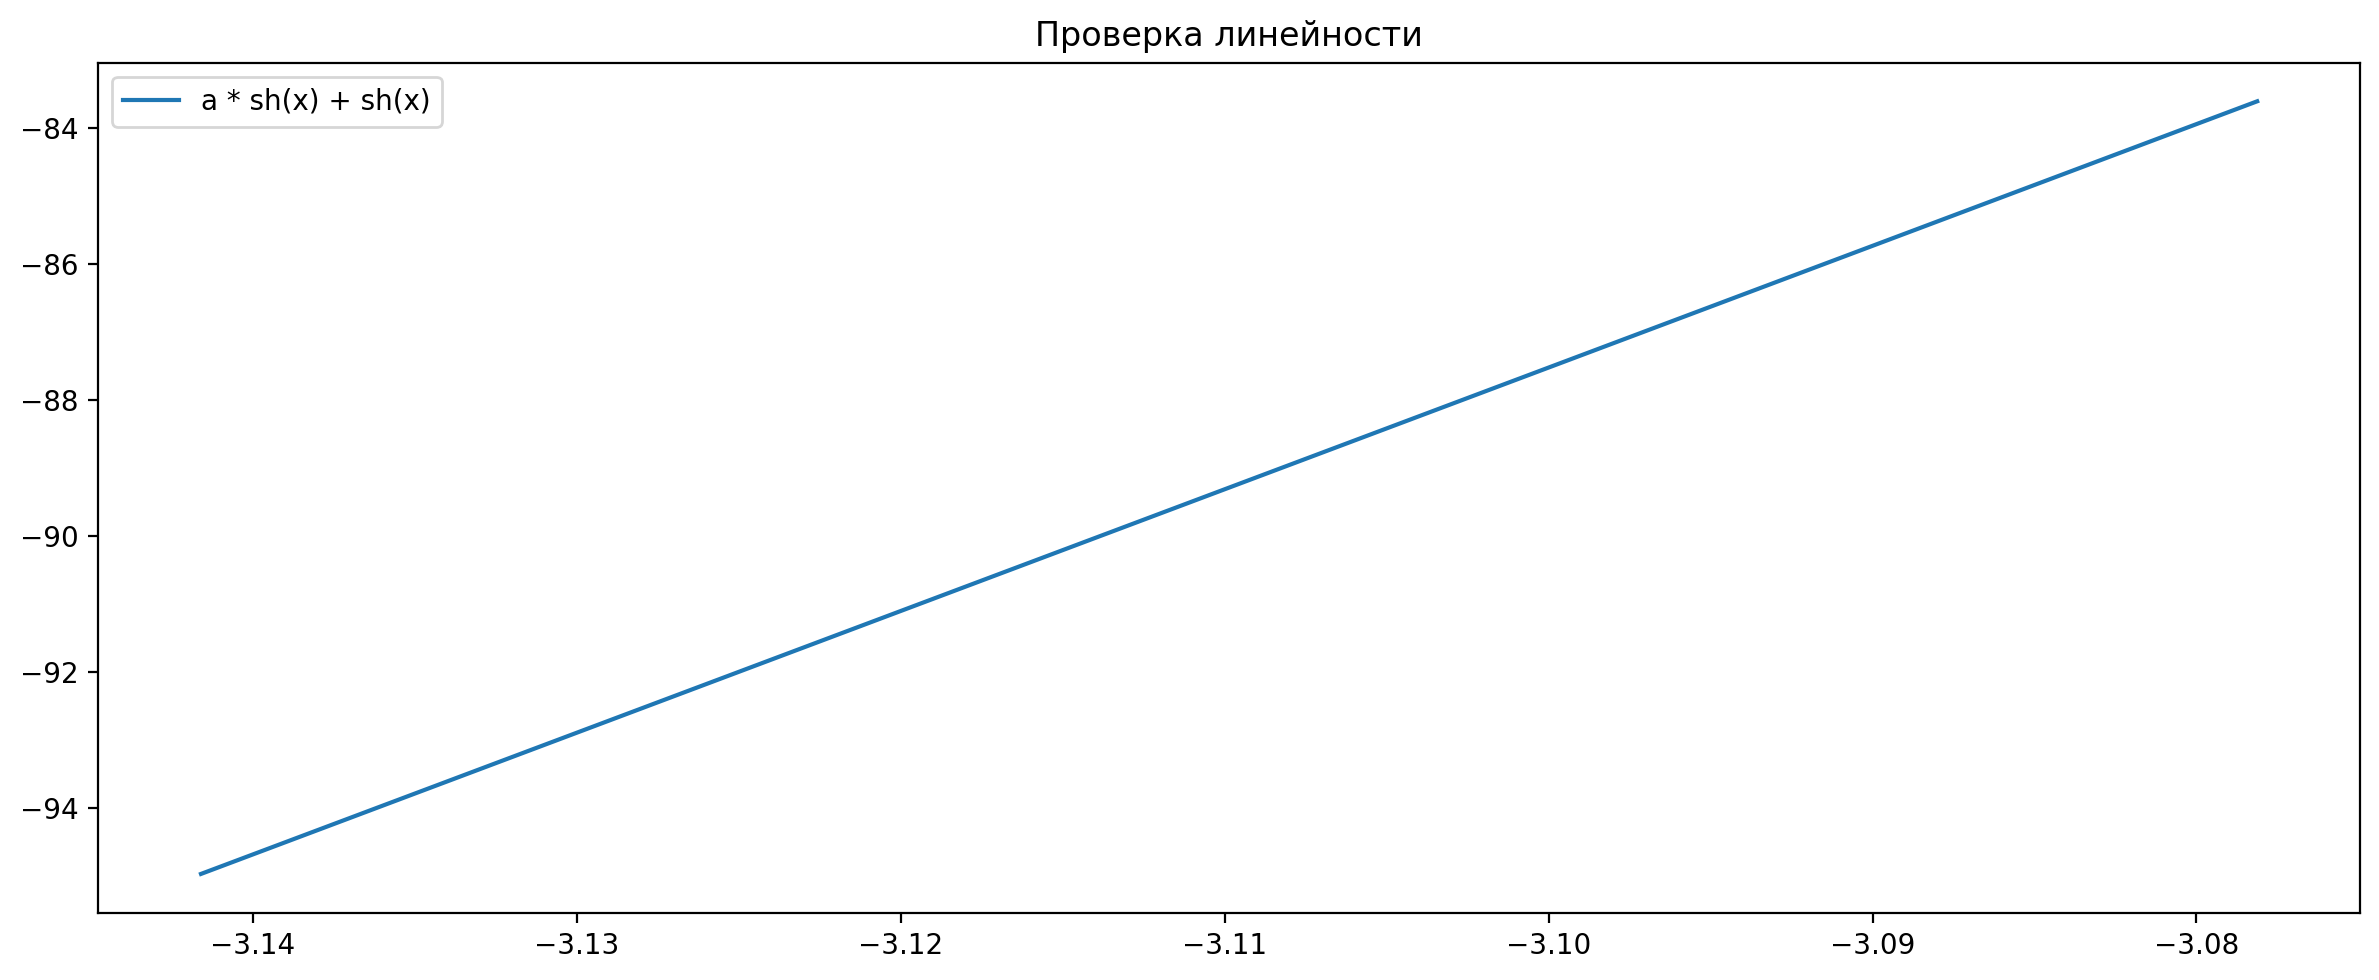

In [6]:
# 3 — Проверка линейности вейвлета 
# (superposition principle)
a = 5  # Коэффициент для проверки линейности
a_signal = a * np.sinh(x)  # Функция a * sh(x)
a_coeffs = pywt.dwt(a_signal, 'haar')  # Непрерывное вейвлет-преобразование для новой функции
linear_check = a_coeffs[0] + coeffs[0]  # Проверка линейности: superposition principle

plt.figure(figsize=(12, 5), dpi=200)
plt.plot(x[:len(coeffs)], linear_check[:len(coeffs)], label='a * sh(x) + sh(x)')
plt.title('Проверка линейности')
plt.legend()
plt.tight_layout()
plt.show()

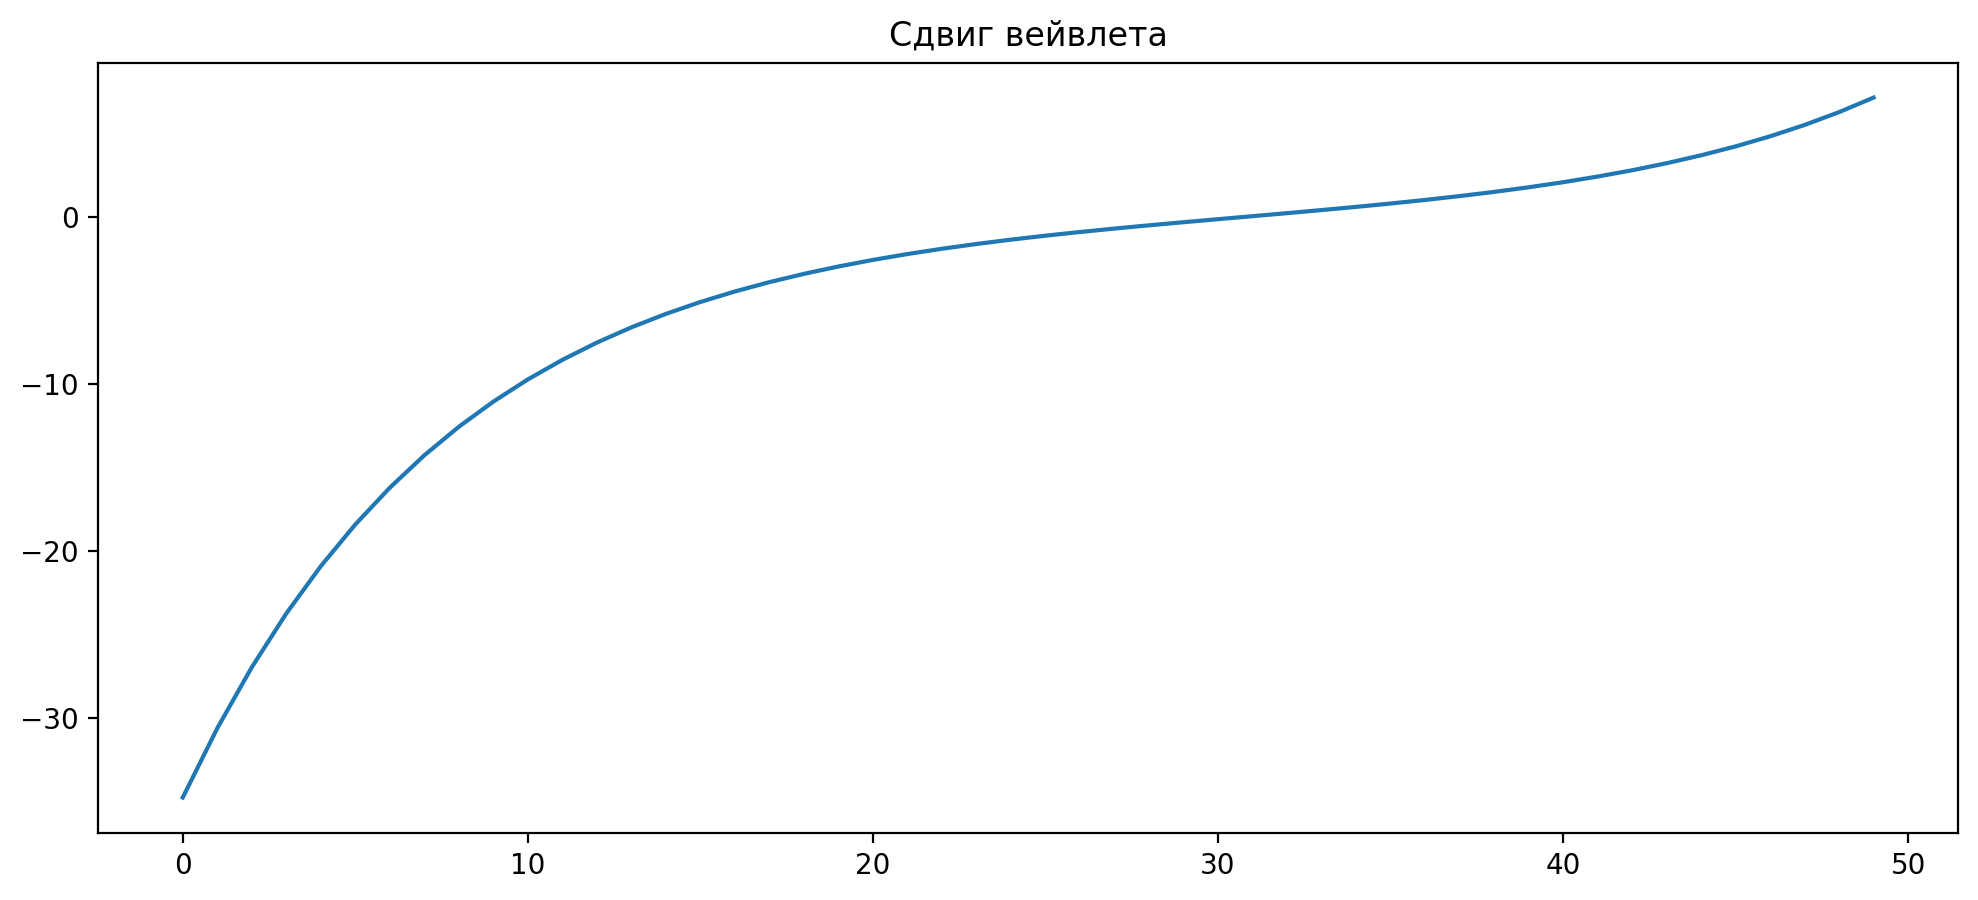

In [7]:
# 4 — Сдвиг вейвлета
shifted_signal = np.sinh(x - np.pi / 4)  # Сигнал sh(x) со сдвигом на π/4
shifted_coefficients = pywt.dwt(shifted_signal, 'haar')  # Вейвлет-преобразование со сдвигом

plt.figure(figsize=(12, 5), dpi=200)
plt.plot(shifted_coefficients[0])
plt.title('Сдвиг вейвлета')
plt.show()
# plt.imshow(shifted_coefficients, extent=(0, 4 * np.pi, 1, 10), cmap='coolwarm', aspect='auto')

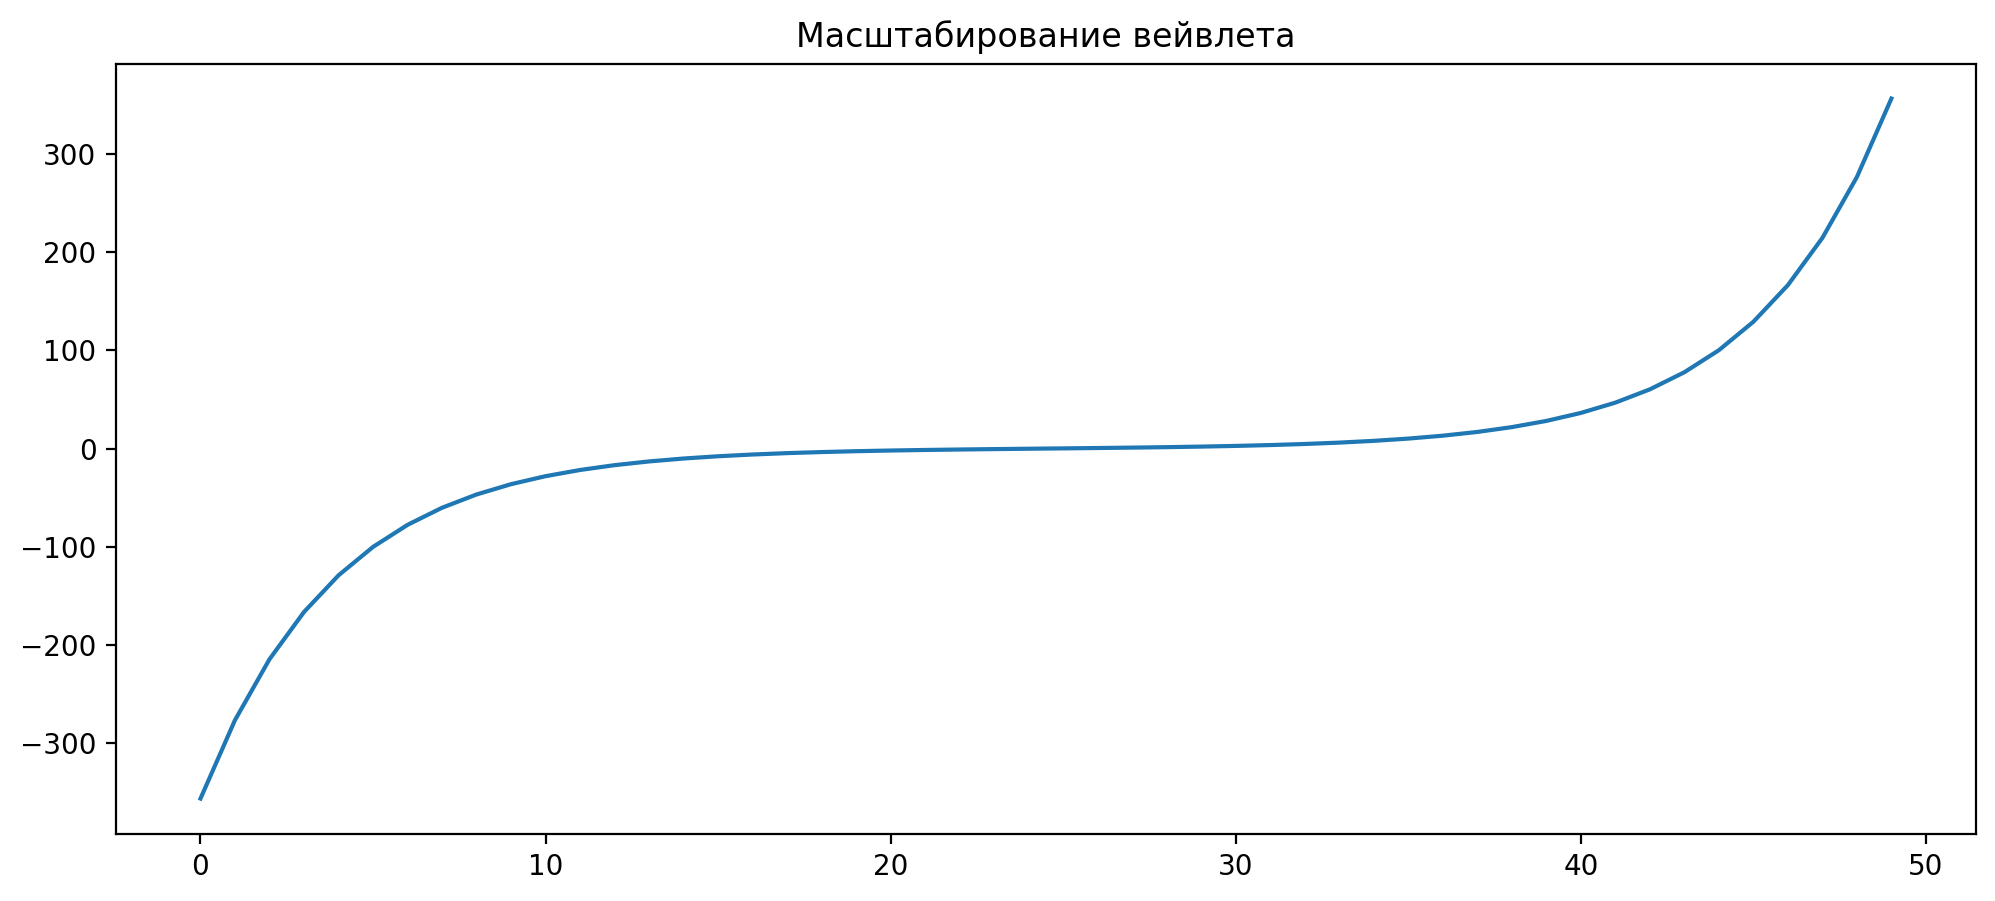

In [8]:
# 5 — Масштабирование вейвлета
scaled_signal = np.sinh(2 * x)  # Сигнал sh(2x)
scaled_coefficients = pywt.dwt(scaled_signal, 'haar')  # Вейвлет-преобразование с масштабированием

plt.figure(figsize=(12, 5), dpi=200)
plt.plot(scaled_coefficients[0])
#plt.imshow(scaled_coefficients, extent=[0, 4*np.pi, 1, 10], cmap='coolwarm', aspect='auto')
plt.title('Масштабирование вейвлета')
plt.show()

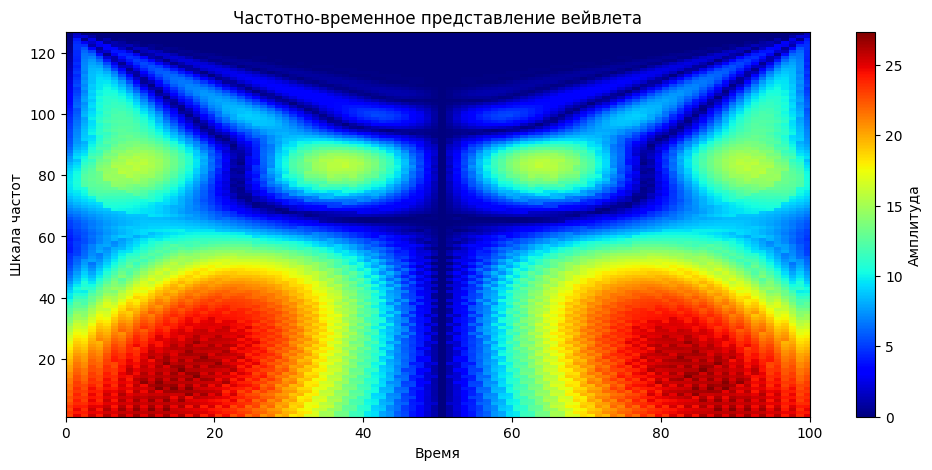

In [9]:
# 6 — Масштабно-временная локализация
scales = np.arange(1, 128)
# Выполнение непрерывного вейвлет-преобразования, выбор вейвлета, например, 'morl'
cwtmatr, freqs = pywt.cwt(signal, scales, 'morl')

# Построение частотно-временного представления вейвлета
plt.figure(figsize=(12, 5))
plt.imshow(np.abs(cwtmatr),
           extent=(0, len(signal), min(scales), max(scales)),
           aspect='auto',
           cmap='jet')
plt.colorbar(label='Амплитуда')
plt.title('Частотно-временное представление вейвлета')
plt.xlabel('Время')
plt.ylabel('Шкала частот')
plt.show()

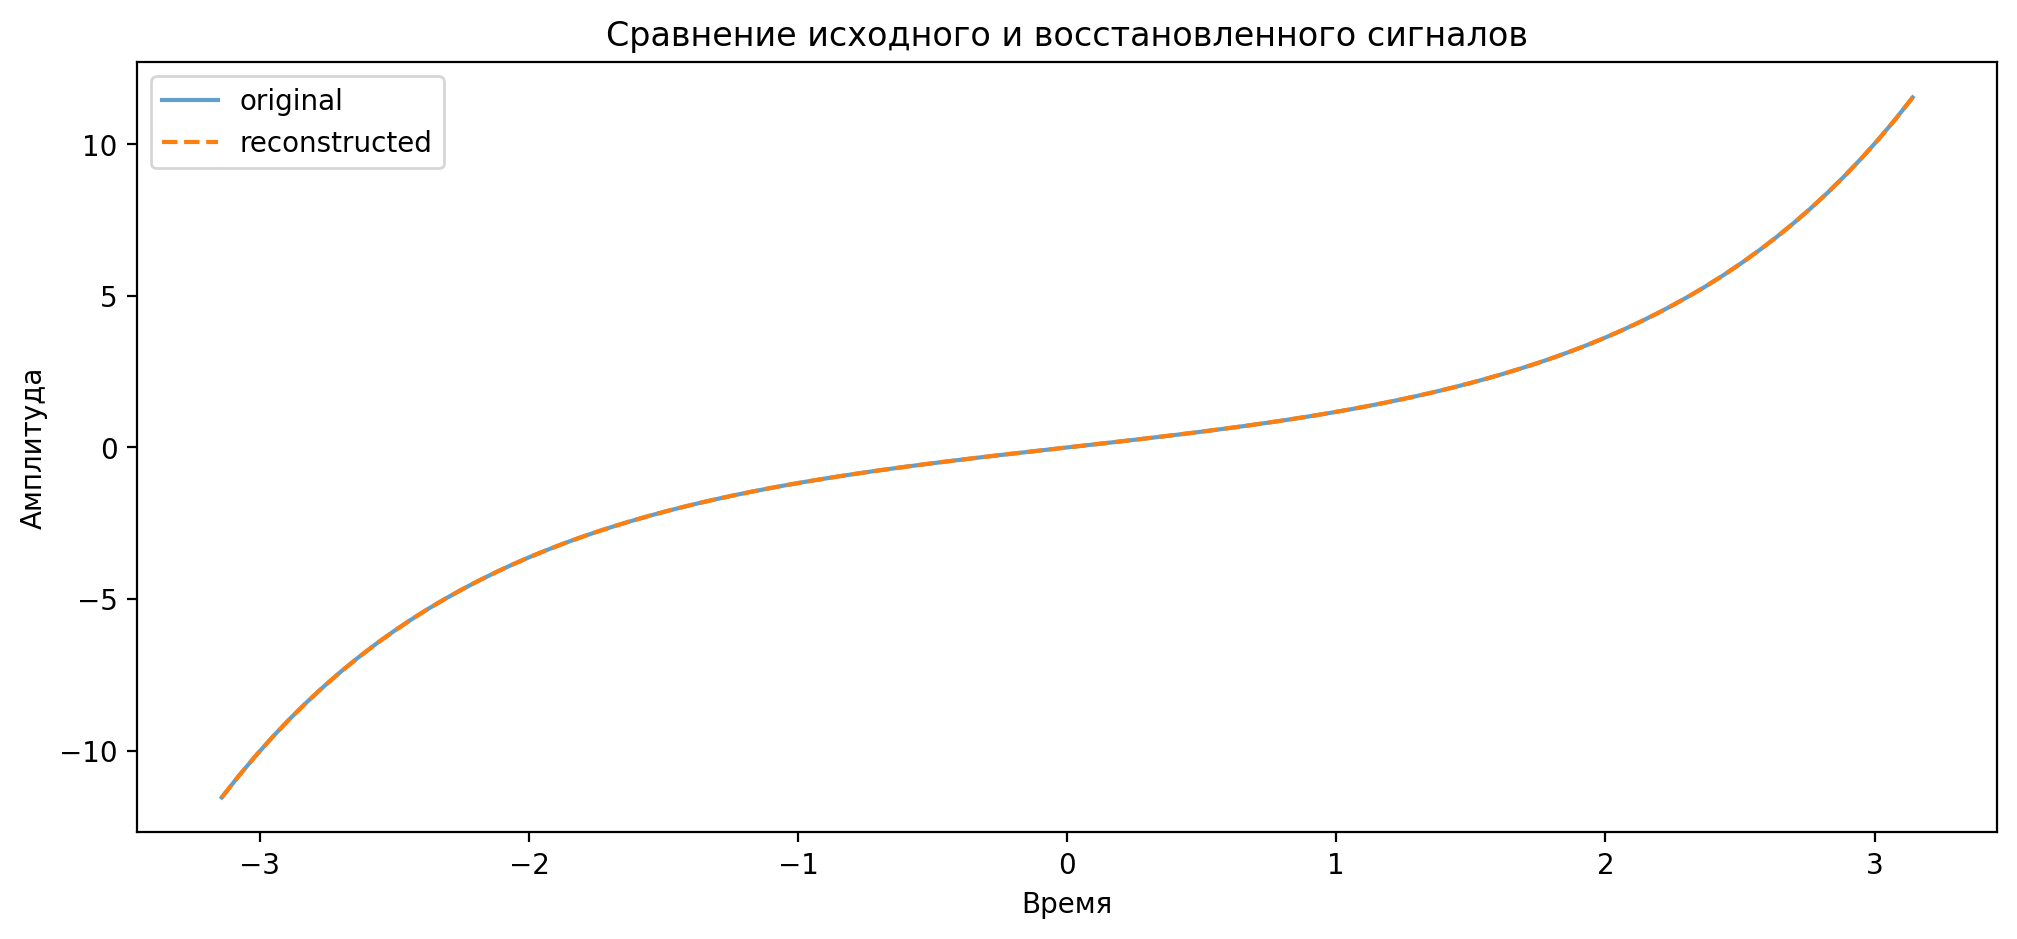

In [10]:
# 7 — Обратное вейвлет-преобразование
coeffs = pywt.dwt(signal, 'haar', "smooth")  # Вейвлет-преобразование
reconstructed_signal = pywt.idwt(coeffs[0], coeffs[1], 'haar', 'smooth')  # Обратное вейвлет-преобразование

# Шаг 4: Визуализация исходного и восстановленного сигналов
plt.figure(figsize=(12, 5), dpi=200)
plt.plot(x, signal, label='original', alpha=0.7)
plt.plot(x, reconstructed_signal, label='reconstructed', linestyle='--')
plt.title('Сравнение исходного и восстановленного сигналов')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend()
plt.show()

In [11]:
aaep = mean_absolute_percentage_error(signal[2:], reconstructed_signal[2:]) * 100

data = {'Средняя абсолютная ошибка в процентах': f'{round(aaep, 13)}%',
        'Стандартное отклонение исходного сигнала:': np.std(signal[1:]),
        'Стандартное отклонение восстановленного сигнала:': np.std(reconstructed_signal[2:])}
data

{'Средняя абсолютная ошибка в процентах': '0.0%',
 'Стандартное отклонение исходного сигнала:': 4.563053071826822,
 'Стандартное отклонение восстановленного сигнала:': 4.449424793592314}